# SimuPark: Un parque simulado

Desarrollado por: 
> Daniel David Delgado Cervantes - 2182066

133.5094207204246


Text(0, 0.5, 'Densidad')

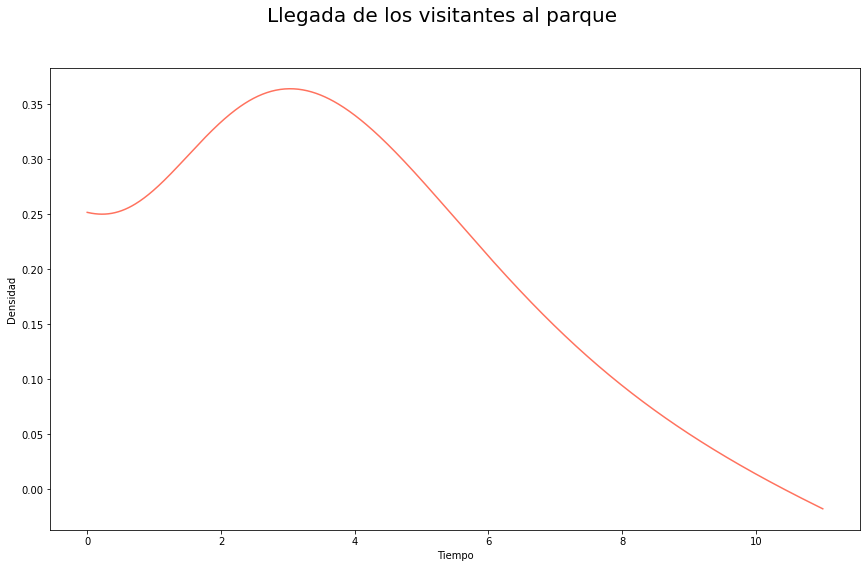

In [18]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 11, 11*60)
k = 5
fn = lambda x, k: (np.power(x + 30/60, k-1) * np.exp(-x - 30/60) / gamma(k)) - (x-10)/40
print(sum(fn(x, k)))

plot(x, fn(x,k), color='#ff725e')
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')

In [19]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

park = Park(
    function=fn
)

park.startDayBase(10000)

10850
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['Dropper', 'Tornado', 'BumpCars', 'SlowRiver', 'StarWarsRide', 'SpaceMountain']
['Tourist']


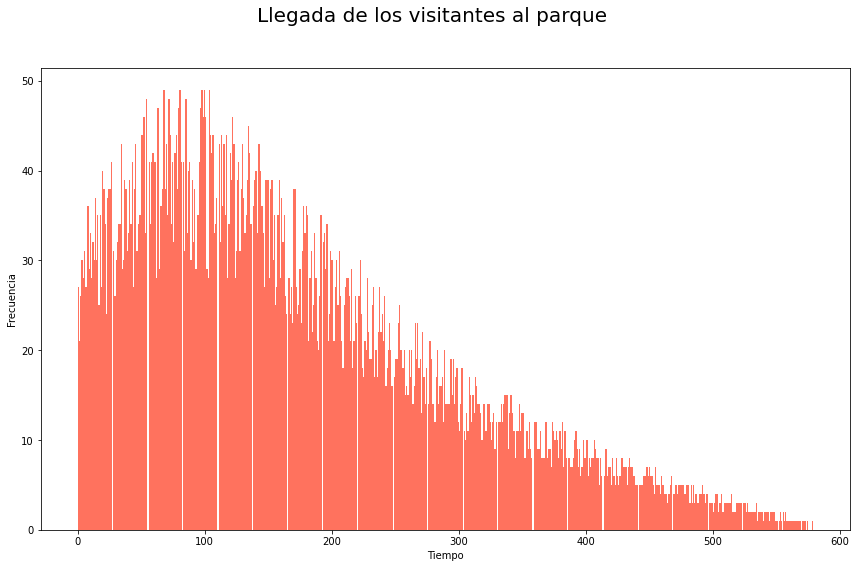

In [20]:
print(len(park.guests))

y = [guest.arrivalTime for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=600);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guestArchetypes])

In [4]:
guestData = []
columnName = [
    'Archetype',
    'arrivalTime',
    'departureTime',
    'timeInPark',
    'maxWait',
    'attractionsExperienced',
    'totalWaitTime',
    'averageWaitTime',
    ]
for guest in park.guests:
    curGuest = []

    curGuest.append(guest.archetype)
    curGuest.append(guest.arrivalTime)
    curGuest.append(guest.departureTime)
    curGuest.append(guest.departureTime - guest.arrivalTime)
    curGuest.append(guest.maxWait)
    curGuest.append(guest.attractionsExperienced)
    curGuest.append(guest.totalWaitTime)
    if guest.attractionsExperienced == 0:
        curGuest.append(0)
    else: 
        curGuest.append(guest.totalWaitTime / guest.attractionsExperienced)

    guestData.append(curGuest)

guestDF = pd.DataFrame(guestData, columns=columnName)
guestDF

,Archetype,arrivalTime,departureTime,timeInPark,maxWait,attractionsExperienced,totalWaitTime,averageWaitTime
0,Tourist,0,394,394,41,10,149,14.900000
1,Tourist,0,566,566,53,6,124,20.666667
2,Tourist,0,455,455,67,10,253,25.300000
3,Tourist,0,430,430,32,12,58,4.833333
4,Tourist,0,534,534,112,17,308,18.117647
...,...,...,...,...,...,...,...,...
9580,Tourist,566,933,367,101,2,85,42.500000
9581,Tourist,567,940,373,109,1,41,41.000000
9582,Tourist,568,937,369,83,1,38,38.000000
9583,Tourist,569,900,331,85,2,80,40.000000


Atracciones experimentadas promedio: 6.808137715179969


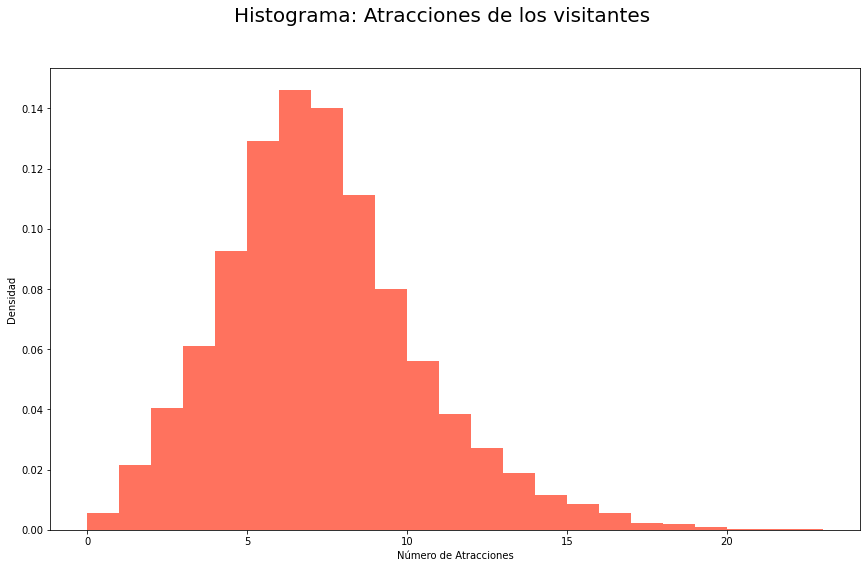

In [5]:
attrExp = [guest.attractionsExperienced for guest in park.guests]
attrExp

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(attrExp, bins=np.max(guestDF['attractionsExperienced']), density=True, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')

35.95333231717614


Text(0, 0.5, 'Densidad')

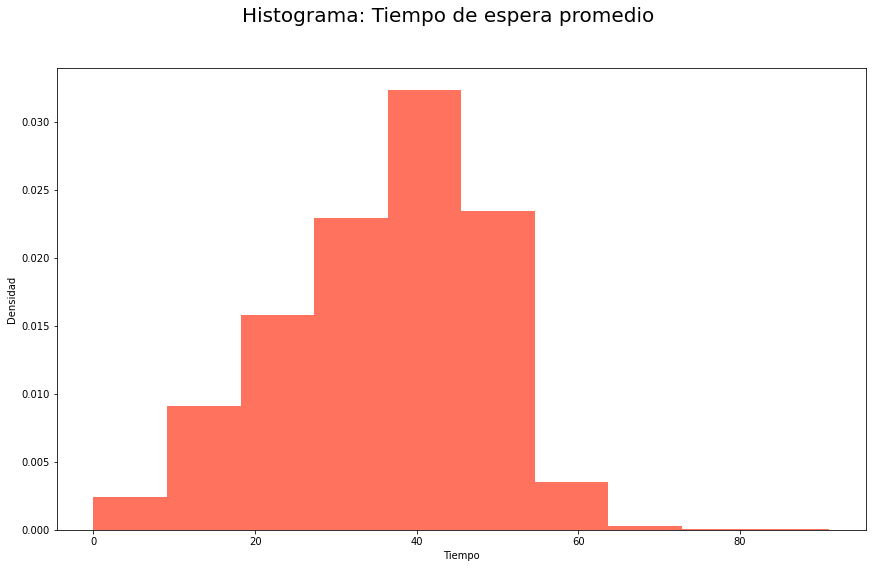

In [6]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractionsExperienced == 0:
        continue

    avgWaitTime.append(guest.totalWaitTime / guest.attractionsExperienced)

print(np.mean(avgWaitTime))

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [7]:
attrWaitTime = [[attr.name, attr.queue.topWaitTime] for attr in park.attractions]
attrDF = pd.DataFrame(attrWaitTime, columns=["Name", "MaximunWaitTime"])
attrDF

,Name,MaximunWaitTime
0,Dropper,25
1,Tornado,25
2,BumpCars,5
3,SlowRiver,5
4,StarWarsRide,40
5,SpaceMountain,35
